# Linear algebra for Finance (in Python)

## Basic definitions

A matrix is a rectangular array of objects. Example of a $2 \times 3$ matrix would be:

$A= 
\begin{pmatrix}
-1 & -0.5 & 3 \\
0.4 & 0 & 2
\end{pmatrix}$

When $m=n$ the matrix is called a square matrix, with $m$ the number of rows, and $n$ the number of columns.

The matrix transpose interchanges rows and columns:

$A'= 
\begin{pmatrix}
-1 & 0.4 \\
-0.5 & 0 \\
3 & 2
\end{pmatrix}$

If $A$ is square and $A=A'$ then $A$ is called a symmetric matrix.

A real vector is a a row or a column of real numbers.

## Laws of matrix algebra

In [1]:
import numpy as np

Matrices of the same dimension can be added element by element. They can also be subtracted element by element. The zero matrix has zero in every element.

In [21]:
A = np.array([[1, 2],
            [3, 4]])
B = np.array([[5, 6],
             [7, 8]])

A + B

array([[ 6,  8],
       [10, 12]])

Matrix A can be multiplied by a scalar $x$ by multiplying each element of A by that number:

In [3]:
A = np.array([[0, 1],
             [-1, 2]])

2 * A

array([[ 0,  2],
       [-2,  4]])

The dot product of two non-zero vectors is the sum of the element-by-element products. It is only defined for two vectors of the same dimension. When the dot product of two non-zero vectors is 0, the vectors are called orthogonal.

In [5]:
a = np.array([1, 2, 3])
b = np.array([-1, 1, 2])

np.dot(a, b)

7

The matrix product of two matrices only exists if the number of rows in the second matrix is equal to the number of columns in the first matrix.

In [7]:
A = np.array([[0, 1, -1],
             [1, 2, 0]])

B = np.array([[1, 0, 2, 1],
             [0, 0, 1, -1],
             [2, -1, 0, 2]])

np.matmul(A, B)

array([[-2,  1,  1, -3],
       [ 1,  0,  4, -1]])

Matrices are non-commutative. It matters in which order we do the multiplication. If $A$ and $B$ are two square matrices of the same dimension, so that you can find both $AB$ and $BA$, then $AB \neq BA$ in general.

Only some matrices, called commutative matrices, have the property that $AB = BA$. A diagonal matrix is a square matrix with all non-diagonal elements being zero. Clearly diagonal matrices are commutative.

Another useful law is that the transpose of a product of two matrices is the product of the transposes in reverse order:

$$ (AB)'= B' A'$$

A similar thing happens when we take the inverse of a product of two square matrices.

## Singular matrices

The unit or identity matrix $I$ is a special square matrix with 1s along the main diagonal and 0s everywhere else. E.g.,

$I= 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}$

which basically acts like the number 1 in ordinary algebra, i.e., $AI = A$ and $IA = A$.

In [19]:
I = np.identity(4)
print('identity matrix:', I)

np.matmul(B, I)

identity matrix: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


array([[ 1.,  0.,  2.,  1.],
       [ 0.,  0.,  1., -1.],
       [ 2., -1.,  0.,  2.]])

The inverse of a square matrix $A$ is denoted $A^{-1}$. It has the property that $AA^{-1}= A^{-1}$ $A = I$, where $I$ is the identity matrix. So, all matrices commute with their inverse. 

If $A$ and $B$ are both square matrices of the same dimension then $(AB)^{-1} = B^{-1} A^{-1}$.

Not all square matrices have an inverse. A matrix that has an inverse is called a non-singular matrix. Otherwise it is called a singular matrix.

A singular matrix has at least one row or column that is a weighted sum of some other rows (or columns).

In [23]:
A = np.array([[1, 2],
            [3, 4]])

np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

## Determinants

Given any $2 \times 2$ square matrix $\begin{pmatrix}
a & b  \\
c & d  \\
\end{pmatrix}$, the quantity $ad - bc$ is called the determinant of the matrix, denoted $|A|$.

In [24]:
np.linalg.det(A)

-2.0000000000000004

A square matrix $A$ is diagonalizable if there exists another matrix $P$ such that $P^{-1} AP = D$, where $D$ is a diagonal matrix.

## Solution of simultaneous linear equations

Simultaneous linear equations must be solved in hedging problems e.g., to find gamma neutral and/or vega neutral portfolios. They're also used to find the eigenvector of a matrix.

__Example__

$x - 2y + 3z = 1$

$2x + 4y = 3$

$2y - z = 0$

The above set of equations can be rewritten in matrix form, $Ax = b$, where $A$ is the matrix of coefficients, $x$ is the vector of variables and $b$ is the vector of constants:

$A = \begin{pmatrix}
1 & -2 & 3  \\
2 & 4 & 0  \\
0 & 2 & -1 
\end{pmatrix}$, $x = \begin{pmatrix}
x \\
y \\
z
\end{pmatrix}$, and $b = \begin{pmatrix}
1 \\
3 \\
0
\end{pmatrix}$

There is a unique solution to this if and only if $A$ is a square non-singular matrix, i.e., if its inverse $A^{-1}$ exists. To see this, we can establish $x=A^{-1}b$.

In [26]:
A = np.array([[1, -2, 3],
             [2, 4, 0],
             [0, 2, -1]])

b = np.array([[1],
             [3],
             [0]])

x = np.matmul(np.linalg.inv(A), b)
print(x)

[[ 2.  ]
 [-0.25]
 [-0.5 ]]


## Quadratic forms

If $A$ is a square matrix of dimension $n$, and $x$ is an n-dimensional vector, then the expression $x'Ax$ is called a quadratic form.

In [33]:
A = np.array([[1, 2],
             [3, 4]])

x = np.array([[-1],
             [1]])

np.matmul(np.matmul(np.transpose(x), A), x)

array([[0]])

When writing $x'Ax$ it is customary to assume that $A$ is not only square but also symmetric. We can also note:

$$x'Ax= \frac{1}{2} x' (A + A') x = x'Bx $$

## Definite matrices

The value of the quadratic form could be zero, positive or negative, depending on the vector __x__. A positive definite matrix is a square matrix $A$ that has the property that $x'Ax$ is always positive, whatever the values in the vector $x$, except when they are all zero.

A positive definite matrix must always have positive diagonal elements.

A negative definite matrix is a square matrix $A$ having the property that $x'Ax$ is always negative, for every non-zero vector $x$. Negative definite matrices must always have negative diagonal elements.

We can use determinants to test whether a matrix is positive definite. 

* A symmetric matrix is positive definite if and only if all its principal minors have positive determinant.
* A symmetric matrix is positive semi-definite if all its principal minors have positive or zero determinant.
* A symmetric matrix is negative definite if an only if the determinants of the principal minors are non-zero and alternate in signs {$-,+,-,+,...$}.
* A symmetric matrix is negative definite if the determinants of the principal minors alternate in signs as {$\leq 0, \geq 0, \leq 0, \geq 0$}.

In [35]:
# we want to find out if A is positive definite
A = np.array([[1, 1, 2],
             [1, 5, -4],
            [-2, -4, 6]])

# we first replace A by its symmetric equivalent in the quadratic form (B)
B = 0.5 * (A + np.transpose(A))

In [36]:
B

array([[ 1.,  1.,  0.],
       [ 1.,  5., -4.],
       [ 0., -4.,  6.]])

We examine the principal minors of $B$ i.e., the determinants of the cofactors where the index of the column that is deleted is the same as the index of the row that is deleted.

The principal minors of order 1 are the diagonal elements and they're all positive.

The principal minors of order 2 are:

In [38]:
M_11 = np.array([[5, -4],
                [-4, 6]])

M_22 = np.array([[1, 0],
                [0, 6]])

M_33 = np.array([[1, 1],
                [1, 5]])

print(np.linalg.det(M_11))
print(np.linalg.det(M_22))
print(np.linalg.det(M_33))

13.999999999999996
6.0
4.0


The principal minor of order 3 is the determinant of B.

In [39]:
print(np.linalg.det(B))

7.999999999999998


Since all the principal minors are positive, $B$ is positive definite. Hence we conclude that $x'Ax$ is always positive for every non-zero vector $x$. $A$ is positive definite.

## Eigenvectors and eigenvalues

Every square matrix has the same number of eigenvalues as its dimension. E.g., a $2 \times 2$ matrix has two eigenvalues. The eigenvalues are scalars and to each distinct eigenvalue there belongs an infinite set of eigenvectors. 

An eigenvector is a vector that is expanded or contracted but not 'rotated' by the matrix transformation. The eigenvalue is the scaling constant by which the eigenvector is expanded or contracted. So it is only when the eigenvalue is 1 that an eigenvector is exactly invariant under the matrix transformation.

__Formal definitions__

The general definition of an eigenvector $w$ of a square matrix $A$ is any vector $w$ such that $Aw = \lambda w$, for some constant $\lambda$. In other words, eigenvectors are those vectors that are translated by the matrix to another vector on the same line through the origin. This $\lambda$ is called the eigenvalue belong to the eigenvector $w$. 

We usually take a representative normalized eigenvector. For instance, we may consider only eigenvectors $w$ that have unit distance from the origin, which is measured by the square root of the sum of the squared elements of $w$:

$$(x_1^2+...+x_n^2)^{1/2}=1 $$

__The characteristic equation__

Eigenvalues are found by solving the characteristic equation for the matrix.

$$(A - \lambda I) = 0$$

A non-zero solution for $w$ exists only if the matrix $(A - \lambda I)$ cannot be inverted, i.e., if $|(A - \lambda I)| = 0$. This expression is called the characteristic equation of $A$.

`numpy` has handy functions to find eigenvalues and eigenvectors. It provides the normalized eigenvectors.

In [40]:
A = np.array([[2, -1],
             [-2, 3]])

print(np.linalg.eig(A))

(array([1., 4.]), array([[-0.70710678,  0.4472136 ],
       [-0.70710678, -0.89442719]]))


For any symmetric matrix, any two eigenvectors belonging to the different eigenvalues must be orthogonal (their dot product is 0). In 2 dim, this means that the eigenvectors of a symmetric matrix are perpendicular.

In [49]:
C = np.array([[1, 0.5, 0.2],
             [0.5, 1, 0.3],
            [0.2, 0.3, 1]])

print(np.linalg.eig(C))

(array([1.68390863, 0.48716053, 0.82893084]), array([[-0.60759268, -0.65036916, -0.45590689],
       [-0.64655665,  0.7383939 , -0.19167408],
       [-0.46129777, -0.17830987,  0.86914323]]))


__Eigenvalue test for definiteness__

The following conditions are equivalent:
* A symmetric matrix __A__ is positive definite.
* The quadratic form __x'Ax__ is positive for every vector __x__ $\neq 0$.
* All eigenvalues of __A__ are positive.

The following conditions are also equivalent:
* A symmetric matrix __A__ is positive semi-definite.
* The quadratic form __x'Ax__ $\geq 0$ for every vector __x__.
* All eigenvalues of __A__ are non-negative.

## Applications to linear portfolios

For a portfolio to be linear, its return must be a linear combination (a weighted sum) of the returns on its constituent assets. It is convenient then to represent the portfolio's risk and return in matrix form.

__Covariance and correlation matrices__

$V$ is the covariance matrix of returns. Any covariance matrix can also be expressed as $V = DCD$, where $D$ is a diagonal matrix of returns standard deviations and $C$ is the returns correlation matrix.

In [50]:
D = np.array([[0.2, 0, 0],
             [0, 0.1, 0],
             [0, 0, 0.15]])

C = np.array([[1, 0.8, 0.5],
             [0.8, 1, 0.3],
             [0.5, 0.3, 1]])

V = np.matmul(np.matmul(D, C), D)
print(V)

[[0.04   0.016  0.015 ]
 [0.016  0.01   0.0045]
 [0.015  0.0045 0.0225]]


The variance of a portfolio is a quadratic function of the variances and covariances on the constituent assets: $V(R) = w'Vw$.

In [58]:
# return on asset has vol = 10%
# return on asset has vol = 20%
# asset returns have correl = 0.5
# 2m invested in asset 1, 3m in asset 2

V = np.array([[0.01, 0.01],
             [0.01, 0.04]])

w = np.array([[0.4],
             [0.6]])

annual_var = np.matmul(np.matmul(np.transpose(w), V), w)
annual_std = np.sqrt(annual_var)
investment = 5000000

print("Annual portfolio variance: ", annual_var)
print("Annual portfolio volatility: ", annual_std)
print("Annual P&L volatility :", annual_std * investment)

Annual portfolio variance:  [[0.0208]]
Annual portfolio volatility:  [[0.14422205]]
Annual P&L volatility : [[721110.2550928]]


In [59]:
# show that matrix A is not positive semi-definite and so it cannot represent a correlation matrix
A = np.array([[1, -0.9, -0.8],
             [-0.9, 1, -0.5],
             [-0.8, -0.5, 1]])

print(np.linalg.eig(A))

(array([-0.47880968,  1.98402996,  1.49477972]), array([[-0.63125477, -0.77210056, -0.07333586],
       [-0.56413309,  0.52198947, -0.63975062],
       [-0.53223235,  0.36247444,  0.76507581]]))


We find eigenvalues of A that are $-0.4788$, $1.9840$ and $1.4948$. Since of the eigenvalues is negative the matrix is not positive semi-definite. The eigenvalues have different signs so it is not definite at all.

During the stress testing of portfolios, volatilities and correlations are changed subjectively and there is a chance that the perturbed matrix will not be positive semi-definite, in which case it cannot represent a correlation matrix.

## Matrix decomposition

__Spectral decomposition of a symmetric matrix__

Introduding ways to decompose a matrix into a product of two (or more) other matrices. Spectral decomposition forms the basis of principal component analysis. The Cholesky decomposition and the LU decomposition can be used for generating correlated simulations.

Given a square matrix $A$, $\Lambda$ the diagonal matrix of eigenvalues of $A$ (eigenvalues along main diagonal and zeros elsewhere). Eigenvectors are in $W$. We can express the eigenvector-eigenvalue condition in matrix form as:

$$AW = W \Lambda$$

Imagine $W$ is invertible (i.e., eigenvalues are linearly independent) and can be written:

$$A = W \Lambda W^{-1}$$

Since $W$ is orthogonal ($W^{-1}=W'$):

$$A = W \Lambda W'$$

This is called the spectral decomposition of a square symmetric matrix $A$.

In [64]:
# let C be a correlation matrix
C = np.array([[1, .8, .5],
             [.8, 1, .3],
             [.5, .3, 1]])

# find the eigenvalues and eigenvectors of C
eigenvalues, eigenvectors = np.linalg.eig(C)

# verify the spectral decomposition for C
print(np.matmul(np.matmul(eigenvectors, np.diag(eigenvalues)), np.transpose(eigenvectors)))

[[1.  0.8 0.5]
 [0.8 1.  0.3]
 [0.5 0.3 1. ]]


__Similarity transforms__

The trace of a square matrix $A$, denoted $tr(A)$ is the sum of the diagonal elements of A.

$$tr(A) = tr(P^{-1}AP)$$

For any invertible matrix $P$ of the same dimension as $A$.

A transformation of the type $P^{-1}AP$ is called a similarity transform, and the matrices $A$ and $P^{-1}AP$ are called similar matrices. When 2 matrices are similar, they have the same trace, the same eigenvalues, the same determinant and the same rank.

Thus, the sum of the eigenvalues of any square matrix $A$ is equal to the sum of the diagonal elements of $A$.

__Cholesky decomposition__

A square matrix is called upper triangular if it has only zeros below the main diagonal and lower triangular if it has only zeros above the main diagonal. If a symmetric matrix $A$ is positive definite then there exists a lower triangular square matrix $Q$ of the same dimension as $A$ such that:

$$A = QQ'$$

This matrix is called the Cholesky matrix of $A$. It acts like the square root of a matrix and only exists if the matrix is positive semi-definite.

In [65]:
# Find the Cholesky matrix for matrix A
A = np.array([[1, -1],
             [-1, 2]])

print(np.linalg.cholesky(A))

[[ 1.  0.]
 [-1.  1.]]


In [66]:
A = np.array([[1, -1, -2],
             [-1, 5, 4],
             [-2, 4, 6]])

print(np.linalg.cholesky(A))

[[ 1.  0.  0.]
 [-1.  2.  0.]
 [-2.  1.  1.]]


In [68]:
# find the Cholesky matrix of A
A = np.array([[1, 2, 0, 3],
             [2, 13, 9, 12],
             [0, 9, 13, 8],
             [3, 12, 8, 30]])

# we first check that A is positive definite by finding its eigenvalues
print(np.linalg.eig(A))

(array([41.11208853, 11.74974899,  0.31161414,  3.82654835]), array([[-0.08281852, -0.08271252,  0.94463381, -0.30653989],
       [-0.4662467 ,  0.40266342, -0.24821237, -0.74757394],
       [-0.37593441,  0.71553969,  0.20839311,  0.5506801 ],
       [-0.79651015, -0.56482188, -0.05128261,  0.20956602]]))


In [71]:
# once we confirm that A is indeed positive definite, we can then find its Cholesky matrix
Q = np.linalg.cholesky(A)
print("Cholesky matrix of A: ", Q)

# we can also get the eigenvalues of the Cholesky Matrix
print("Eigenvalues of Q:", np.linalg.eig(Q))

Cholesky matrix of A:  [[1. 0. 0. 0.]
 [2. 3. 0. 0.]
 [0. 3. 2. 0.]
 [3. 2. 1. 4.]]
Eigenvalues of Q: (array([4., 2., 3., 1.]), array([[ 0.        ,  0.        ,  0.        ,  0.27975144],
       [ 0.        ,  0.        ,  0.16903085, -0.27975144],
       [ 0.        ,  0.89442719,  0.50709255,  0.83925433],
       [ 1.        , -0.4472136 , -0.84515425, -0.37300192]]))


__LU decomposition__

Cholesky decomposition is a special case of LU decomposition. An LU decomposition of a square matrix $A$ takes the form

$$ A = LU $$

where $L$ is a lower triangular matrix and $U$ is an upper triangular matrix of the same dimension as $A$.

In [73]:
# find the LU decomposition of A
A = np.array([[1, 2, 0, 1],
             [2, 2, 2, -3],
             [0, 1, 3, 8],
             [1, -1, 8, -2]])

eigenvalues, eigenvectors = np.linalg.eig(A)
print("Eigenvalues of A: ", eigenvalues)

Eigenvalues of A:  [-8.53391948 -0.06784035  3.677386    8.92437383]


In [84]:
from scipy.linalg import lu

p, l, u = lu(A)
print(p, l, u)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]] [[ 1.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.        ]
 [ 0.         -0.5         1.          0.        ]
 [ 0.5        -0.5         0.38461538  1.        ]] [[ 2.          2.          2.         -3.        ]
 [ 0.         -2.          7.         -0.5       ]
 [ 0.          0.          6.5         7.75      ]
 [ 0.          0.          0.         -0.73076923]]


In [83]:
# we can then verify the relationsip A=LU
LU = np.matmul(np.matmul(p,l), u)
print(LU)

[[ 1.00000000e+00  2.00000000e+00  1.38777878e-16  1.00000000e+00]
 [ 2.00000000e+00  2.00000000e+00  2.00000000e+00 -3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  3.00000000e+00  8.00000000e+00]
 [ 1.00000000e+00 -1.00000000e+00  8.00000000e+00 -2.00000000e+00]]


## Principal component analysis

PCA is based on the spectral decomposition of a covariance matrix or a correlation matrix. We use the relationship:

$$A = W \Lambda W' $$

where $A$ is either a covariance matrix or the corresponding correlation matrix.

If PCA is performed on a correlation matrix then the results will only be influenced by the correlations of returns. But if the input to PCA is a covariance matrix then the results will be influenced by the volatility of the returns as well as the correlations of returns. There is no general relationship between the principal components of a covariance matrix and those of its correlation matrix.

PCA is the simpliest of numerous orthogonalization techniques that transform a set of correlated variables into a set of uncorrelated variables. It is very popular for financial risk management applications.

PCA can be applied to any set of stationary time series, regardless of how high or how low their correlation is. It does work best on highly correlated systems such as a set of zero coupon returns of different maturities, a set of commodity futures of different maturities, or an implied volatility surface. In short, PCA works best for term structures.

PCA is commonly used for market risk assessment and to reduce dimensionality for stress testing and scenario analysis.

### Definition of principal components

Denote by $X$ the $T \times n$ matrix of time series of the different stationary variables (returns).

The sample variances and covariances of these data are summarized by a matrix:

$$V = T^{-1}X'X $$

We define each principal component to be a linear combination of the columns of $X$ where the weights are chosen in such a way that:
* the principal components are uncorrelated with each other
* the first principal component explains the most variation (i.e., the greatest amount of the total variation in $X$) and the second component explains the greatest amount of the remaining variation etc.

Denote by $\Lambda$ the diagonal matrix of eigenvalues of $V$ and by $W$ the orthogonal matrix of eigenvectors of $V$. In $\Lambda$ we order the eigenvalues (and their corresponding eigenvectors in $W$) from largest to smallest. The matrix of principal components of $V$ is a $T \times n$ matrix $P$ defined as the product of the matrix of input data $X$ with the eigenvector matrix of $V$:

$$P=XW$$

Each principal component is a time series i.e., a $T \times 1$ vector.

The covariance matrix $T^{-1}P'P$ of the principal components is $\Lambda$. This shows that:
* the covariance matrix is diagonal i.e., the principal components are uncorrelated
* the variance of the $m$th principal component is $\lambda_m$, the $m$th largest eigenvalue of $V$

The total variation in $X$ is the sum of the eigenvalues of $V$ i.e., $\lambda_1 + \lambda_2 + ... + \lambda_n$. Hence the proportion of this total variation that is explained by the $m$th principal component is:

$$\frac{\lambda_m}{\lambda_1 + ... + \lambda_n} $$

In a highly correlated system, the first (largest) eigenvalue will be much larger that the others, so the first principal component alone can explain a very large part of the movements in returns. The first principal component (i.e., the one given by the eigenvector belonging to the largest eigenvalue) explains most of the variation, etc.

#### Principal component representation

Since $P=XW$ and $W'=W^{-1}$ we have $X=PW'$. In other words we can write each of the original returns that are input to the PCA as a linear combination of the principal components, as

$$x_i = w_{i1}p_1 + w_{i2}p_2 + ... + w_{ik}p_k$$

We can write

$$X \approx P^{*}W^{*'} $$

where $X$ is the $T \times n$ matrix of returns, $P^{*}$ is a $T \times k$ matrix with columns being the first k principal components, and $W^*$ is a $k \times n$ matrix with $k$ columns given by the first k eigenvectors.

It is this type of principal component representation of the original variables in terms of only a few uncorrelated factors that lies at the core of PCA models.

## Case study: PCA of European equity indices

In [86]:
import pandas_datareader.data as web
import datetime

In [87]:
start = datetime.datetime(2001, 1, 2)
end = datetime.datetime(2006, 7, 17)

In [92]:
indices = ['^AEX', '^FCHI', '^GDAXI', '^IBEX']
data = web.DataReader(indices, 'yahoo', start, end)['Close']
data.tail()

Symbols,^AEX,^FCHI,^GDAXI,^IBEX
Date,,,,
2006-07-11,438.570007,4914.390137,5616.040039,11535.200195
2006-07-12,440.429993,4941.729980,5637.819824,11537.299805
2006-07-13,434.410004,4852.520020,5527.290039,11375.000000
2006-07-14,428.329987,4780.790039,5422.220215,11240.200195
2006-07-17,427.230011,4750.080078,5416.959961,11179.400391


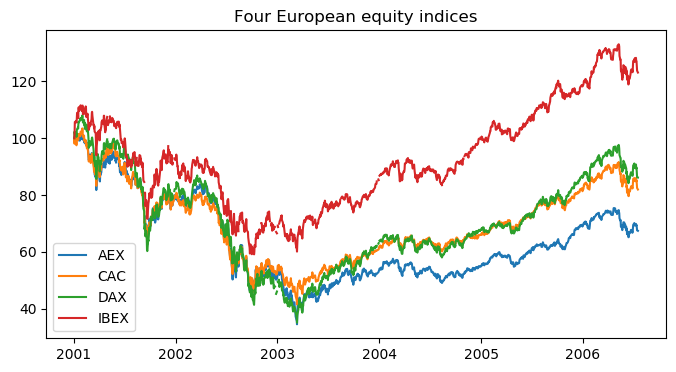

In [149]:
import matplotlib.pyplot as plt
plt.style.use('default')

data_norm = 100 * (data / data.iloc[0, :])

plt.figure(figsize=(8, 4))
plt.plot(data_norm)
plt.legend(['AEX', 'CAC', 'DAX', 'IBEX'])
plt.title('Four European equity indices');

In [125]:
daily_returns = data.pct_change(1).dropna()
daily_returns

Symbols,^AEX,^FCHI,^GDAXI,^IBEX
Date,,,,
2001-01-03,-0.006781,-0.019805,0.023075,0.013293
2001-01-04,0.014464,0.023212,-0.009079,0.043072
2001-01-05,-0.004961,-0.009967,0.000905,0.000438
2001-01-08,-0.007314,-0.004380,0.001545,0.002312
2001-01-09,0.003042,-0.012142,0.001932,-0.004343
...,...,...,...,...
2006-07-11,-0.009060,-0.013666,-0.015821,-0.009812
2006-07-12,0.004241,0.005563,0.003878,0.000182
2006-07-13,-0.013668,-0.018052,-0.019605,-0.014067


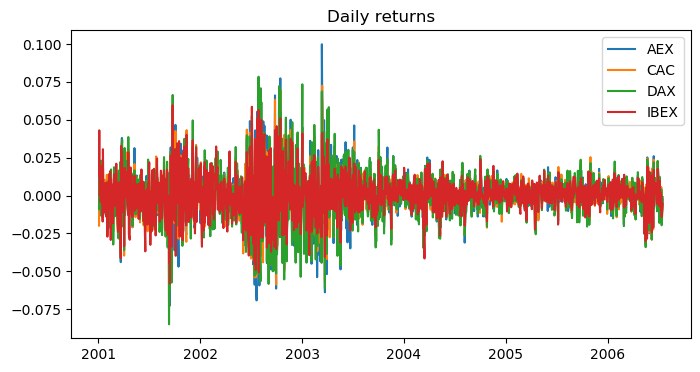

In [151]:
plt.figure(figsize=(8, 4))
plt.plot(daily_returns)
plt.legend(['AEX', 'CAC', 'DAX', 'IBEX'])
plt.title('Daily returns');

In [128]:
# we first compute the correlation matrix (could also be the covariance matrix)
# PCA will be performed on this matrix

corr = daily_returns.corr()
print("Correlation matrix ", corr.shape)
print(corr)

Correlation matrix  (4, 4)
Symbols      ^AEX     ^FCHI    ^GDAXI     ^IBEX
Symbols                                        
^AEX     1.000000  0.916624  0.815297  0.838201
^FCHI    0.916624  1.000000  0.863950  0.860368
^GDAXI   0.815297  0.863950  1.000000  0.777928
^IBEX    0.838201  0.860368  0.777928  1.000000


In [129]:
# we then compute the eigenvalues and eigenvectors of the correlation matrix
eig_val, eig_vec = np.linalg.eig(corr)
print("Eigenvectors ", eig_vec)
print("Eigenvalues ", eig_val)

Eigenvectors  [[ 0.50510171  0.53655608  0.6586441   0.15220967]
 [ 0.51512886 -0.81310128  0.27072798 -0.01466014]
 [ 0.48818162  0.20260229 -0.36197642 -0.76785682]
 [ 0.49111427  0.09963023 -0.60155414  0.62210385]]
Eigenvalues  [3.53779533 0.07443645 0.16315059 0.22461764]


In [131]:
# we need to sort the eigenvectors according to descending order of eigenvalue
indices = np.arange(0, len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:, indices]
print("Sorted eigenvectors ", eig_vec)
print("Sorted eigenvalues ", eig_val)

Sorted eigenvectors  [[ 0.50510171  0.15220967  0.6586441   0.53655608]
 [ 0.51512886 -0.01466014  0.27072798 -0.81310128]
 [ 0.48818162 -0.76785682 -0.36197642  0.20260229]
 [ 0.49111427  0.62210385 -0.60155414  0.09963023]]
Sorted eigenvalues  [3.53779533 0.22461764 0.16315059 0.07443645]


In [132]:
# we then compute the explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val / sum_eig_val
print(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.88444883 0.05615441 0.04078765 0.01860911]
[0.88444883 0.94060324 0.98139089 1.        ]


We see that only the first component has a meaningful interpretation in this case. The interpretation of the first principal component will be linked to the high correlation of the returns.

The first PC explains $88.4%$ of the variation, the second $5.61%$ of the variation etc. The cumulative variation explained is above $95%$ with three components.

We can then transform our data according to a k-component representation where our daily returns can be expressed as linear combinations of the principal components.

We note that all the returns ahve a similar coefficient on the first component so when the first PC changes and the other components remain unchnaged then all the returns will change by approximately the same amount. The first component captures the common trend that is sahred by these stock indices.

In [187]:
# here we select the first two components 
# we perform here the matrix transformation of our original data
# using our desired principal components
pca_data = np.dot(daily_returns, eig_vec[0:4, 0:3])
print(pca_data.shape, pca_data)

(1418, 3) [[ 0.00416593 -0.0101909  -0.02617693]
 [ 0.03598415  0.03562736 -0.00681329]
 [-0.00698366 -0.00103156 -0.00655685]
 ...
 [-0.03268278  0.00448668  0.00166895]
 [-0.02978401  0.00531052  0.00078934]
 [-0.00773622 -0.00291684  0.00017457]]


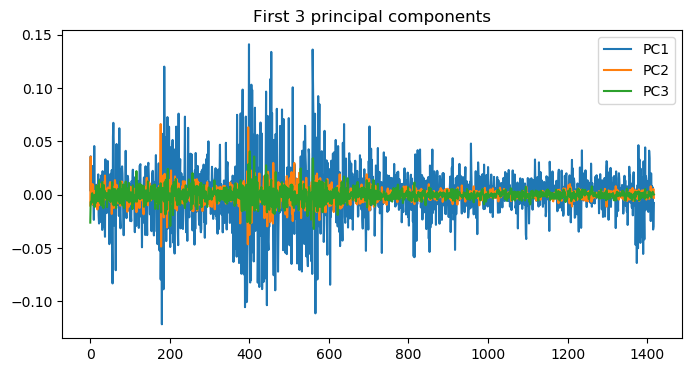

In [188]:
# we can visualize how our transformed data under PCA look like
plt.figure(figsize=(8, 4))
plt.plot(pca_data)
plt.legend(['PC1', 'PC2', 'PC3'])
plt.title('First 3 principal components');

The first principal component's features are those that are common to all the returns in the system.

In [189]:
# we can finally reconstruct our original data out of a 3-component representation
recons = np.dot(pca_data, np.transpose(eig_vec[0:4, 0:3]))
print(recons.shape, recons)

(1418, 4) [[-0.01668821 -0.00479143  0.01933432  0.01145299]
 [ 0.01911095  0.01616963 -0.00732366  0.04393481]
 [-0.0080031  -0.00535748 -0.00024378 -0.00012721]
 ...
 [-0.01472597 -0.01644979 -0.02000438 -0.01426377]
 [-0.01371575 -0.01520676 -0.01890345 -0.01179849]
 [-0.00423657 -0.00389513 -0.00160016 -0.00571896]]


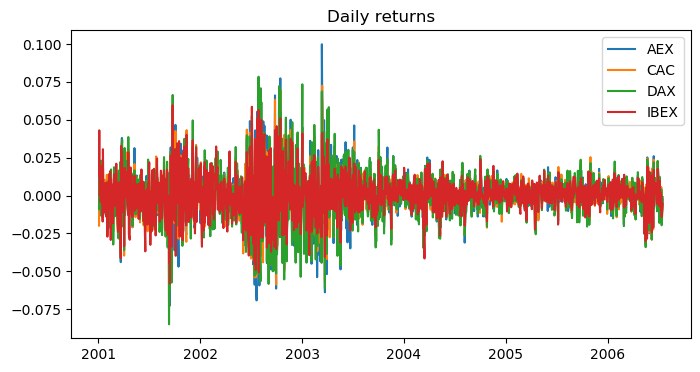

In [190]:
plt.figure(figsize=(8, 4))
plt.plot(daily_returns)
plt.legend(['AEX', 'CAC', 'DAX', 'IBEX'])
plt.title('Daily returns');

In [191]:
# as we can see here the loss post reconstruction is quite minimal with 3 PCs.
loss = np.mean(np.square(recons - daily_returns))
print("Reconstruction loss ", loss)

Reconstruction loss  Symbols
^AEX      5.177273e-06
^FCHI     1.188941e-05
^GDAXI    7.381753e-07
^IBEX     1.785061e-07
dtype: float64
